# Assessment of Data and Applying Normalization on Abalone Dataset

## Libraries Utilized:
- numpy
- pandas
- seaborn
- matplotlib
- scipy
- scikit-learn 

## Attributes in the Dataset

### Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict: either as a continuous value or as a classification problem. 

| Name | Data Type | Meas. | Description |
| :---: | :---: | :---: | :---: |
| Sex|nominal | | M, F, and I (infant) |
|Length|	continuous|	mm |         Longest shell measurement|
|Diameter|	continuous|	mm |	perpendicular to length|
|Height|	continuous|	mm |	with meat in shell|
|Whole weight|	continuous|	grams|	whole abalone|
|Shucked weight|	continuous|	grams|	weight of meat|
|Viscera weight|	continuous|	grams|	gut weight (after bleeding)|
|Shell weight|	continuous|	grams|	after being dried|
|Rings	|integer|		|+1.5 gives the age in years|

## Importing libraries 

In [1]:
import pandas as pd
import random
import seaborn as sns
import numpy as np
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn import neighbors, datasets, preprocessing
from sklearn.neighbors import KNeighborsClassifier
warnings.filterwarnings("ignore")

## Loading the Abalone Dataset

In [2]:
N = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight','Rings']
df1 = pd.read_csv("/Users/nehapranadika/Downloads/ECE 657A - Winter 2022 - 1302022 - 128 PM/abalone.csv", sep=',',names = ['Sex','Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight','Rings'])

## 1.1 Exploring the features, their ranges and distribution

In [3]:
df1.head(5)

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


###  We can see that all of the attributes, with the exception of "Sex," are numerical in nature. Sex is a categorical variable with three potential outcomes. We will tackle that with a one hot encoding. The labels are all of the integer type </span>


## 1.2 Missing data

In [4]:
df1.describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


###  As seen from the above table, it is clear that our data does not contain missing values. This is clear from the fact that count of all the features are the same. Further evidence for this is shown below. </span>

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole_weight    4177 non-null   float64
 5   Shucked_weight  4177 non-null   float64
 6   Viscera_weight  4177 non-null   float64
 7   Shell_weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


###  As we can see, it is clear that there are no null values in each feature.</span>

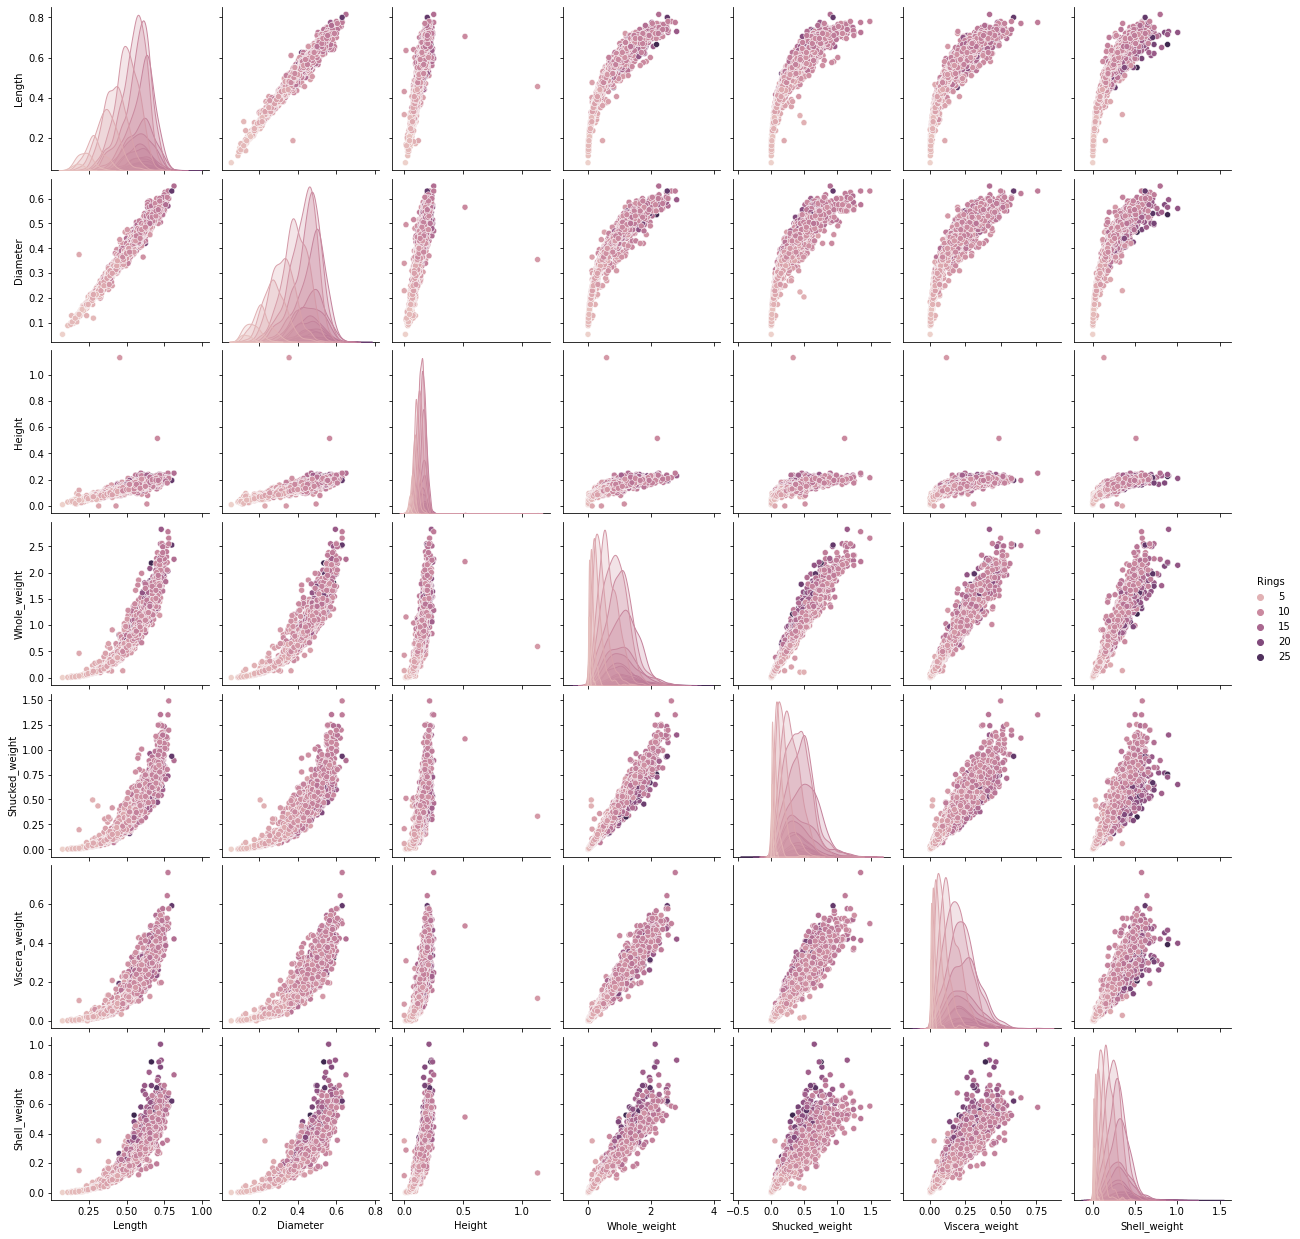

In [6]:
%matplotlib inline
a=sns.pairplot(df1, hue="Rings")

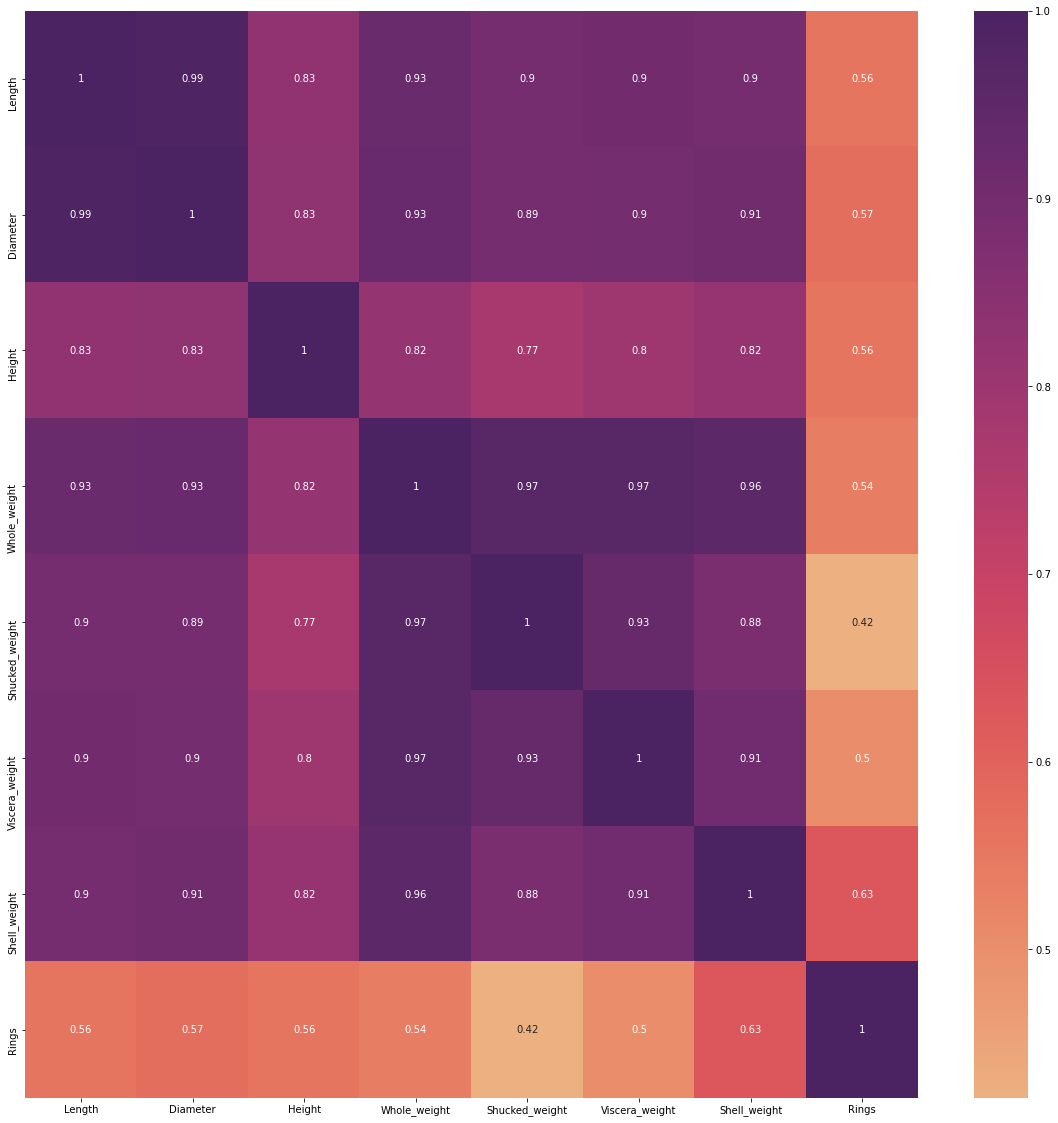

In [7]:
# plotting correlation coeeficients using heat map
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
df1_heat_map=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="flare")

###  Conclusions drawn from the correlation maps shown above</span>
- Whole Weight is almost linearly varying with all other features except rings
- Height has least linearity with remaining features
- Rings is most linearly proprtional with Shell Weight followed by Diameter and length
- Rings is least correlated with Shucked Weight

In [8]:
df1.corr()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole_weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked_weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera_weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell_weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## 1.3 Summarization statistics on the data features.

In [9]:
df1[N].describe()

,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### The above table summarizes and explains basic statistics about the given dataset. Among the features, "Height" is a feature that has significantly less spread. This is explained by very less standard deviation. Features like, "Whole_weight", "Shucked_weight, and "Viscera_weight" have quite high \ standard deviation indicating a larger spread of values. One can also note that many of the features have outliers evident from the fact that the extreme values (min and max) in many of the features deviate largely from the 25th and 75th percentile values.</span>

In [10]:
skew = df1[N].skew()
skew

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole_weight      0.530959
Shucked_weight    0.719098
Viscera_weight    0.591852
Shell_weight      0.620927
Rings             1.114102
dtype: float64

### For normally distributed data, the skewness should be about 0. For unimodal continuous distributions, a skewness value > 0 means that there is more weight in the right tail of the distribution. </span>

- **Height has highest skewedness followed by Rings, Shucked weight**

In [11]:
K = df1[N].kurtosis()
K

Length             0.064621
Diameter          -0.045476
Height            76.025509
Whole_weight      -0.023644
Shucked_weight     0.595124
Viscera_weight     0.084012
Shell_weight       0.531926
Rings              2.330687
dtype: float64

### We infer from the above data that the Height is heavy-tailed followed by the rings,shucked weight</span>

array([[<AxesSubplot:title={'center':'Length'}>,
        <AxesSubplot:title={'center':'Diameter'}>,
        <AxesSubplot:title={'center':'Height'}>],
       [<AxesSubplot:title={'center':'Whole_weight'}>,
        <AxesSubplot:title={'center':'Shucked_weight'}>,
        <AxesSubplot:title={'center':'Viscera_weight'}>],
       [<AxesSubplot:title={'center':'Shell_weight'}>,
        <AxesSubplot:title={'center':'Rings'}>, <AxesSubplot:>]],
      dtype=object)

<Figure size 432x288 with 0 Axes>

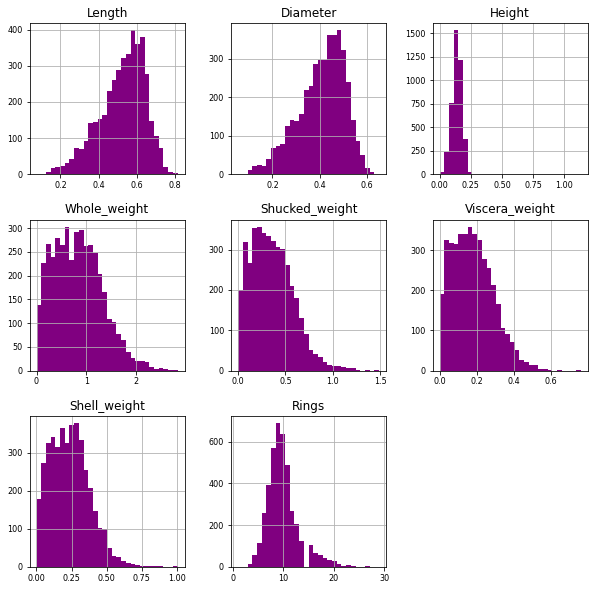

In [12]:
plt.figure()
df1[N].hist(figsize=(10, 10), bins=30, xlabelsize=8, ylabelsize=8, color="purple")

### The graph above backs up our prior conclusions based on the data summary. The "Height" spread is actually fairly narrow. In addition to outliers, there is considerable skew in a number of the characteristics.</span>

### Handling Categorical features using One Hot Encoding

In [13]:
#one hot encoding
one_hot_enc = pd.get_dummies(df1.Sex, prefix='Sex')
df1['Sex_F'] = one_hot_enc['Sex_F']
df1['Sex_I'] = one_hot_enc['Sex_I']
df1['Sex_M'] = one_hot_enc['Sex_M']
df1 = df1.drop(columns = ["Sex"])

### Here, we are performing one hot encoding of the feature "Sex" so that it is easier for us to handle. So we split this feature into 3 distinct features.</span>

## 1.4 Outliers Detection and Removal

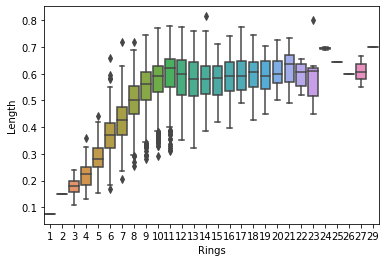

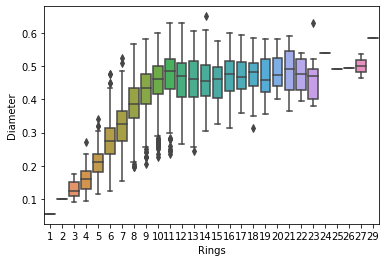

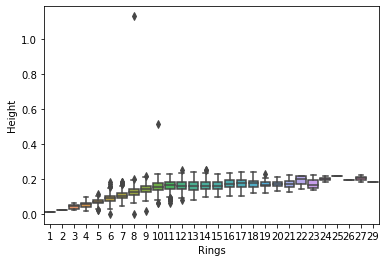

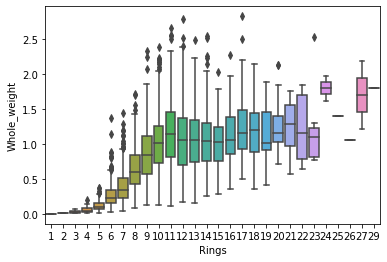

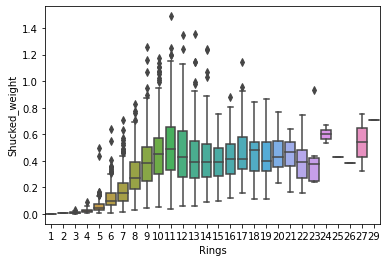

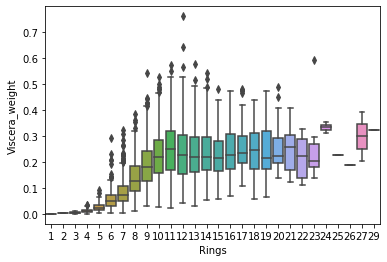

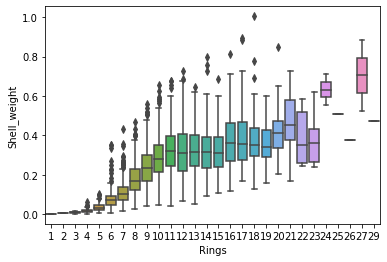

In [14]:
#df1 = df1.drop(columns = drop_columns)
excluded_columns = ["Rings","Sex_M","Sex_I","Sex_F"]
columns = list(df1.columns)
for d in columns:
    if d in excluded_columns:
        continue
    plt.figure()
    ax = sns.boxplot(x=df1['Rings'], y=d, data=df1)
    plt.show()

### We assess the presence of outliers using box plot. Here, we are choosing to ignore including the one hot encoded features as they are not likely to have outliers. Here, we are individually analyzing for outliers in each feature with respect to their label values. We are replacing the outliers with nan value. We are using the method of inter quartile range to detect outlier.</span>

In [15]:
#outlier detection
for column in df1:
    if column in excluded_columns:
        continue
    for s in df1['Rings'].unique():    
        q25 = df1[column][df1['Rings'] == s].quantile(0.25)
        q75 = df1[column][df1['Rings'] == s].quantile(0.75)
        iqr = q75 - q25
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # Identify outliers
        df12 = pd.DataFrame(df1[df1['Rings'] == s][column])
        count = len(df12[df12[column] < lower].index)
        count += len(df12[df12[column] > upper].index)
        # replacing outliers with NaN (Will be later replaced with feature mean)
        for index in df12[df12[column] < lower].index:
            df1.loc[index, column] = np.nan
        for index in df12[df12[column] > upper].index:
            df1.loc[index, column] = np.nan

In [16]:
#replace with median
for column in df1:
    df1[column].fillna(value=df1[column].median(), inplace=True)

In [17]:
df1.isna().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

In [18]:
df_new = df1.copy()
df_new = df_new.dropna()
mean_dict = {}
for col in df_new.columns:
    if col in excluded_columns:
        continue
    else:
        mean_dict[col] = {}
        for ring in df_new["Rings"].unique():
            df_temp = df_new[df_new["Rings"]==ring]
            mean_dict[col][ring] = (df_temp[col].mean()) 

In [19]:
df1_backup = df1.copy()
df1 = df1_backup.copy()
for col in df1.columns:
    for row in range(len(df1[col])):
        if np.isnan(df1.loc[row,col]):
            df1.loc[row,col] = mean_dict[col][df1["Rings"][row]]

### Here, we are replacing the nan values with the mean of the corresponding label it has.  The reason we are choosing not to replace outliers with global mean is because of the presence of class imbalance in the dataset. Due to class imbalance, mean value will posses major contribution from dominating classes which might have a greater influence on the global mean value. So, we choose to calculate mean value for each feature per label and use it to replace the outliers.</span>

In [20]:
df1.isna().sum()

Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
Sex_F             0
Sex_I             0
Sex_M             0
dtype: int64

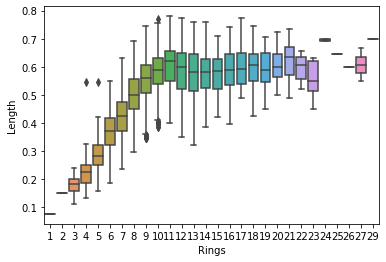

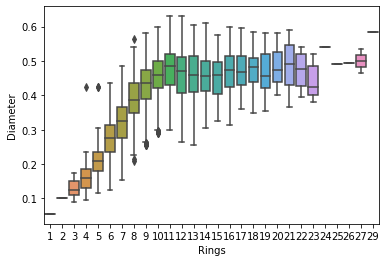

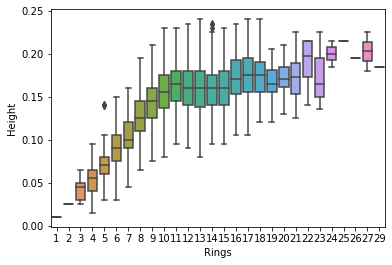

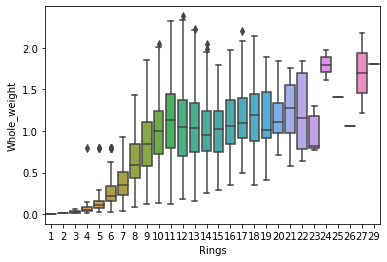

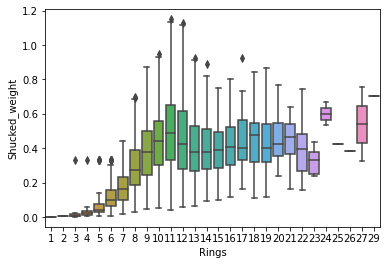

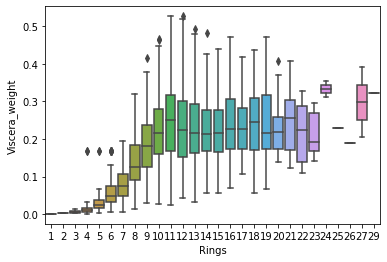

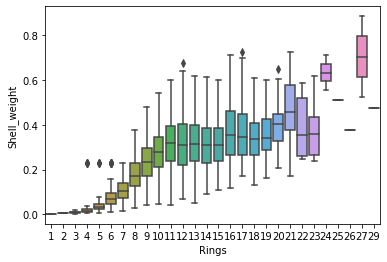

In [21]:
columns = list(df1.columns)
for d in columns:
    if d in excluded_columns:
        continue
    plt.figure()
    ax = sns.boxplot(x=df1['Rings'], y=d, data=df1)
    plt.show()

### As you can see from the box plot above, we were able to detect and eliminate the majority of the outliers using the interquantile techique.

 # 1.5 Balanced or Unbalanced Dataset

(array([  1.,   1.,  15.,  57., 115., 259., 391., 568., 689., 634., 487.,
        267., 203., 126., 103.,  67.,  58.,  42.,  32.,  26.,  14.,   6.,
          9.,   2.,   1.,   1.,   2.,   0.,   1.]),
 array([ 1.        ,  1.96551724,  2.93103448,  3.89655172,  4.86206897,
         5.82758621,  6.79310345,  7.75862069,  8.72413793,  9.68965517,
        10.65517241, 11.62068966, 12.5862069 , 13.55172414, 14.51724138,
        15.48275862, 16.44827586, 17.4137931 , 18.37931034, 19.34482759,
        20.31034483, 21.27586207, 22.24137931, 23.20689655, 24.17241379,
        25.13793103, 26.10344828, 27.06896552, 28.03448276, 29.        ]),
 <BarContainer object of 29 artists>)

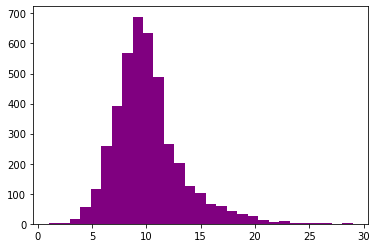

In [22]:
plt.hist(df1["Rings"], bins = 29, color="purple")

### From the above histogram plot, we can clearly see the class imbalance present in the given dataset. Class imbalance means that some labels are heavily under-represented in the given dataset. It is imbalanced towards the extreme Ring values. The question of whether the dataset is usable or not depends on the algorithm we choose to use. KNN is an algorithm that can work with few data values. However, we can see that samples like Ring = 1 have only one sample in the dataset. So, this dataset might not be useful to predict the exact value of Rings. However, by bucketing the data into broader classes, we can choose to get better prediction accuracies.

# 1.6 Normalization

## a) Is Normalization Neccessary?

###  Normalization brings data to a common scale. Especially in KNN algorithm which relies on distance as a metric, it performs better when we normalize data to a generic scale. On top of that, majority of the features are of numeric type which benefits from the centering and standardization effect offered by normalization. Hence, it is essential to normalize the data.

## b) Min-Max Normalization

In [23]:
#Normalizing data using Min-Max method
df1_MinMax = df1[:].copy()
for d in df1_MinMax[:]:
    if d in ['Rings']:
        continue
    df1_MinMax[d] = (df1_MinMax[d] - df1_MinMax[d].min()) / (df1_MinMax[d].max() - df1_MinMax[d].min())

## c) Z-Score Normalization

In [24]:
#Normalizing data using Zscore method
df1_zscore = df1[:].copy()
for d in df1_zscore[:]:
    if d in ['Rings']:
        continue
    df1_zscore = df1_zscore.apply(stats.zscore)

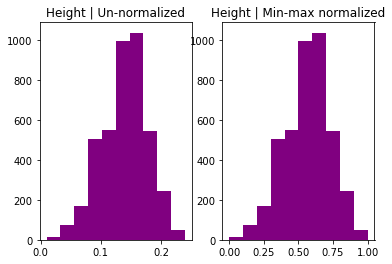

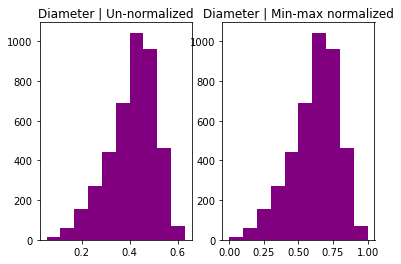

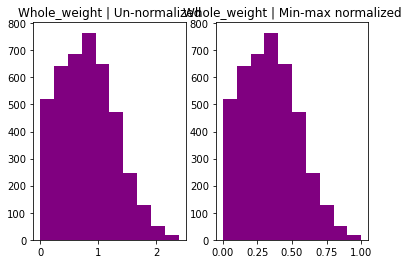

In [25]:
chosen_feature = ["Height","Diameter","Whole_weight"]
for f in chosen_feature:
    plt.subplot(1,2,1)
    plt.title(f+" | Un-normalized")
    plt.hist(df1[f],color="purple")
    plt.subplot(1,2,2)
    plt.title(f+" | Min-max normalized")
    plt.hist(df1_MinMax[f],color="purple")
    plt.show()

### We have chosen "Height", "Diameter" and "Whole_weight" for our study. In Min-Max we notice that the scale of the normalized data is between 0 and 1. This makes sense since we are normalizing each data point with min and max value. This makes it essential for us to remove outliers prior to application of Min-Max normalization since presence of outliers during the application of Min-Max normalization will affect the distribution of the data heavily.

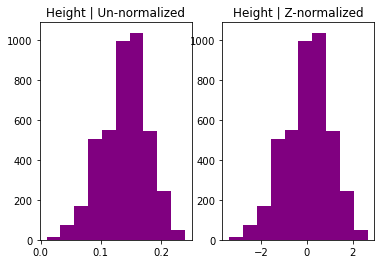

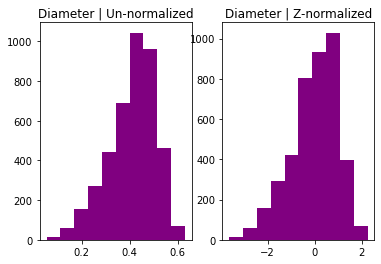

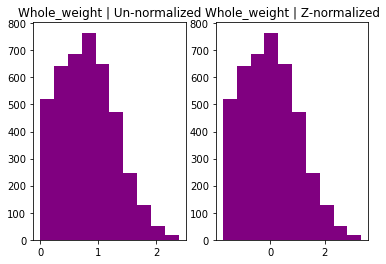

In [26]:
chosen_feature = ["Height","Diameter","Whole_weight"]
for f in chosen_feature:
    plt.subplot(1,2,1)
    plt.title(f+" | Un-normalized")
    plt.hist(df1[f],color="purple")
    plt.subplot(1,2,2)
    plt.title(f+" | Z-normalized")
    plt.hist(df1_zscore[f],color="purple")
    plt.show()

### In case of Z-score normalization, we notice that in each feature, the scale isn't necessarily constrained to 0 to 1. Rather, it centers the data with 0 mean and the quantum of variance increment is unity. This preserves the data distribution irrespective of the presence of outliers. So, unlike Min-Max normalization which is heavily influenced by the presence of outliers, Z-score normalization is not heavily impacted by the presence of outliers. The hist plot shows the normalized data centered at 0 and the original distribution being preserved in the normalized dataset.

# 2) KNN with MinMax
## 2.1 Train -Test Split

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Preparing the data
X = df1_MinMax
# drop_columns = ['Rings','Diameter','Shucked_weight','Viscera_weight','Shell_weight']
drop_columns = ['Rings']
y = df1['Rings']
X = X.drop(columns = drop_columns)

#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

## 2.2 KNN with default parameters

In [28]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  21.88995215311005


## 2.3 Exploring through k values for fine-tuning the model

Best performance is  27.631578947368425  at k = 32 | weights = Uniform | distance = Euclidean


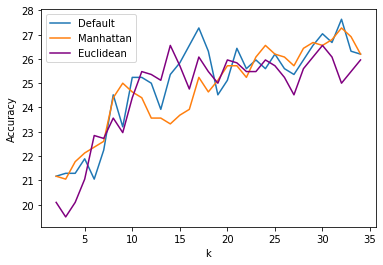

In [29]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(2,35))
m_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    m_acc_default.append(accuracy)
plt.plot(k_list, m_acc_default)


#KNN for Manhatten distance
m_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'distance'
    m_acc_manhatten.append(accuracy)
plt.plot(k_list, m_acc_manhatten)



#KNN for Euclidean distance
m_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'distance'
    m_acc_euclidean.append(accuracy)
plt.plot(k_list, m_acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')

print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

# 2.4 Improving KNN with Z Normalization
## Data preparation

In [30]:
X = df1_zscore
drop_columns = ['Rings']
y = df1['Rings']
X = X.drop(columns = drop_columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

## KNN performance on default settings

In [31]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  23.086124401913878


Best performance is  27.392344497607656  at k = 31 | weights = Uniform | distance = Euclidean


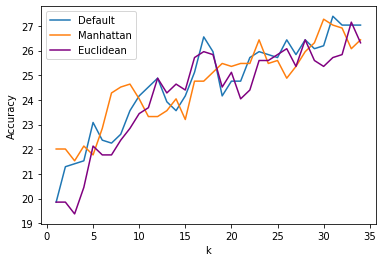

In [32]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(1,35))
z_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    z_acc_default.append(accuracy)
plt.plot(k_list, z_acc_default)


#KNN for Manhatten distance
z_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'Distance'
    z_acc_manhatten.append(accuracy)
plt.plot(k_list, z_acc_manhatten)



#KNN for Euclidean distance
z_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Distance'
    z_acc_euclidean.append(accuracy)
plt.plot(k_list, z_acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

# 2.5 Ablation Study on Normalization
## Data preparation
### Here, we are studying the performance of KNN on un-normalized dataset. This will help us understand the effect of normalization on model performance.

In [33]:
X = df1
y = df1['Rings']
drop_columns = ['Rings']
X = X.drop(columns = drop_columns)

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  22.48803827751196


Best performance is  29.42583732057416  at k = 34 | weights = Uniform | distance = Euclidean


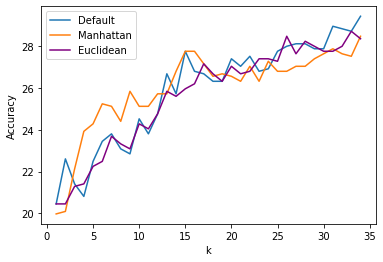

In [36]:
#KNN for default
k_list = list(range(1,35))
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    acc_default.append(accuracy)
plt.plot(k_list, acc_default)


#KNN for Manhatten distance
acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'Distance'
    acc_manhatten.append(accuracy)
plt.plot(k_list, acc_manhatten)



#KNN for Euclidean distance
acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Distance'
    acc_euclidean.append(accuracy)
plt.plot(k_list, acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

### From the comparison, we can see that the performance of KNN is slightly better in un-normalized data. This could be because of a variety of reasons, one being the change in distribution of data due to normalization. However, the performance of KNN model on this data is clearly not very good since it is less than 30%. Although this could be because of several reasons, the primary one seems to be the lack of correlation between the given features and the label we are trying to predict. Internally, several features have good correlation among themselves but none of them lack meaningful correlation with label which can help us predict the Rings. One another reason is the imbalance of dataset although this is might not contribute significantly to the poor performance, it does have a play in impacting performance of KNN model. So in conclusion, normalization did not have any positive impact in this case so we could exclude it from preprocessing step and still get as good performance with KNN model.

# 3) Classification with KNN on Wine Data

## Importing libraries

In [37]:
import os
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report,f1_score,roc_auc_score
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
import warnings
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
from sklearn.metrics import f1_score,roc_auc_score

In [38]:
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'

#Loading Data set
wine_r = pd.read_csv("/Users/nehapranadika/Downloads/ECE 657A - Winter 2022 - 1302022 - 128 PM/winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("/Users/nehapranadika/Downloads/ECE 657A - Winter 2022 - 1302022 - 128 PM/winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

X=wine.drop('quality',axis=1)
Y=wine['quality'].values

## Preliminary analysis on the data

(array([  30.,  216., 2138., 2836., 1079.,  193.,    5.]),
 array([3.        , 3.85714286, 4.71428571, 5.57142857, 6.42857143,
        7.28571429, 8.14285714, 9.        ]),
 <BarContainer object of 7 artists>)

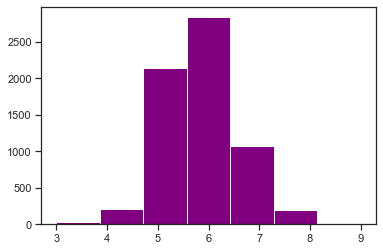

In [39]:
plt.hist(wine['quality'],bins=len(wine['quality'].unique()),color="purple")

###  We can see that the dataset has heavy class imbalance with less representative samples in both extremes of wine qualities.

<AxesSubplot:>

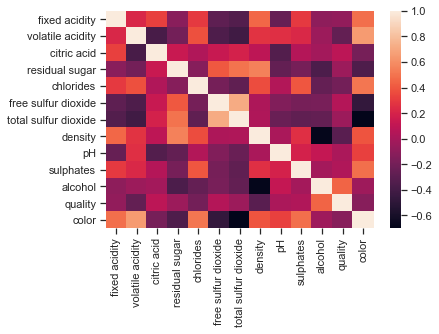

In [40]:
sns.heatmap((wine.corr()))

In [41]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


## Checking is there any Nan Value or Missing data?

In [42]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64

## Checking for outliers

In [43]:
#outlier detection
excluded_columns = ['quality','color']
for column in wine:
    if column in excluded_columns:
        continue
    for s in wine['quality'].unique():    
        q25 = wine[column][wine['quality'] == s].quantile(0.25)
        q75 = wine[column][wine['quality'] == s].quantile(0.75)
        iqr = q75 - q25
        # Calculate the outlier cutoff
        cut_off = iqr * 1.5
        lower, upper = q25 - cut_off, q75 + cut_off
        # Identify outliers
        wine2 = pd.DataFrame(wine[wine['quality'] == s][column])
        count = len(wine2[wine2[column] < lower].index)
        count += len(wine2[wine2[column] > upper].index)
        # replacing outliers with NaN (Will be later replaced with feature mean)
        for index in wine2[wine2[column] < lower].index:
            wine.loc[index, column] = np.nan
        for index in wine2[wine2[column] > upper].index:
            wine.loc[index, column] = np.nan

In [44]:
wine.isna().sum()

fixed acidity           752
volatile acidity        469
citric acid             746
residual sugar          202
chlorides               622
free sulfur dioxide      76
total sulfur dioxide     40
density                  33
pH                      138
sulphates               341
alcohol                  78
quality                   0
color                     0
dtype: int64

In [45]:
wine_new = wine.copy()
wine_new = wine_new.dropna()
mean_dict = {}
for col in wine_new.columns:
    if col in excluded_columns:
        continue
    else:
        mean_dict[col] = {}
        for qual in wine_new["quality"].unique():
            wine_temp = wine_new[wine_new["quality"]==qual]
            mean_dict[col][qual] = (wine_temp[col].mean()) 

In [46]:
# wine = wine_backup.copy()
for i,col in enumerate(wine.columns):
    for row in range(len(wine[col])):
        if np.isnan(wine.iloc[row,i]):
            wine.iloc[row,i] = mean_dict[col][wine.iloc[row,11]]

### We noticed that we identified outliers through IQR method and we replaced the outliers with the mean of the class.

# Normalization

In [47]:
#Normalizing data using Min-Max method
wine_MinMax = wine[:].copy()
for d in wine_MinMax[:]:
    if d in ['quality']:
        continue
    wine_MinMax[d] = (wine_MinMax[d] - wine_MinMax[d].min()) / (wine_MinMax[d].max() - wine_MinMax[d].min())

In [48]:
#Normalizing data using Zscore method
wine_zscore = wine[:].copy()
for d in wine_zscore[:]:
    if d in ['quality']:
        continue
    wine_zscore = wine_zscore.apply(stats.zscore)

# KNN with Min-Max Normalization
## Data preparation

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Preparing the data
X = wine_MinMax
drop_columns = ['quality']
y = wine['quality']
X = X.drop(columns = drop_columns)

#Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

## KNN with default parameters

In [50]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  59.38461538461538


Best performance is  71  at k = 12 | weights = distance | distance = Manhattan


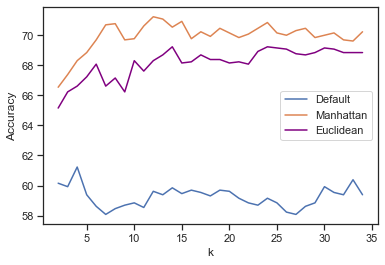

In [51]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(2,35))
m_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    m_acc_default.append(accuracy)
plt.plot(k_list, m_acc_default)


#KNN for Manhatten distance
m_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'distance'
    m_acc_manhatten.append(accuracy)
plt.plot(k_list, m_acc_manhatten)



#KNN for Euclidean distance
m_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'distance'
    m_acc_euclidean.append(accuracy)
plt.plot(k_list, m_acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')

print("Best performance is ",round(perf['Acc'])," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

# KNN with Z Normalization
## Data preparation

In [52]:
X = wine_zscore
drop_columns = ['quality']
y = wine['quality']
X = X.drop(columns = drop_columns)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

## KNN performance on default settings

In [53]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  61.07692307692307


Best performance is  71.38461538461539  at k = 32 | weights = Distance | distance = Manhattan


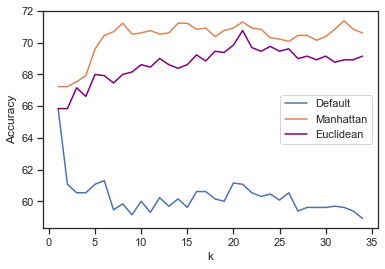

In [54]:
#KNN for default
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
k_list = list(range(1,35))
z_acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    z_acc_default.append(accuracy)
plt.plot(k_list, z_acc_default)


#KNN for Manhatten distance
z_acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'Distance'
    z_acc_manhatten.append(accuracy)
plt.plot(k_list, z_acc_manhatten)



#KNN for Euclidean distance
z_acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Distance'
    z_acc_euclidean.append(accuracy)
plt.plot(k_list, z_acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

# Ablation Study on Normalization
## Data preparation
### Here, we are studying the performance of KNN on un-normalized dataset. This will help us understand the effect of normalization on model performance.

In [55]:
X = wine
y = wine['quality']
drop_columns = ['quality']
X = X.drop(columns = drop_columns)

In [56]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=27)

In [57]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train.values.ravel())
y_pred = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print("For KNN default settings, the accuracy is ",accuracy)

For KNN default settings, the accuracy is  48.61538461538461


Best performance is  63.76923076923077  at k = 11 | weights = Distance | distance = Manhattan


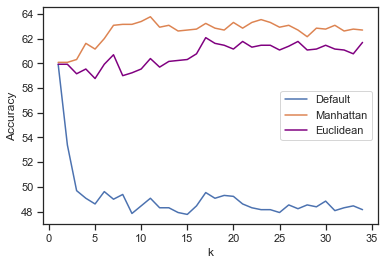

In [58]:
#KNN for default
k_list = list(range(1,35))
perf = {"Acc" : 0,"k":0,"dist": "Manhattan","weights":"uniform"}
acc_default = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'uniform', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Uniform'
    acc_default.append(accuracy)
plt.plot(k_list, acc_default)


#KNN for Manhatten distance
acc_manhatten = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 1, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Manhattan'
        perf['weights'] = 'Distance'
    acc_manhatten.append(accuracy)
plt.plot(k_list, acc_manhatten)



#KNN for Euclidean distance
acc_euclidean = []
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k, weights = 'distance', p = 2, metric ='minkowski')
    knn.fit(X_train, y_train.values.ravel())
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)*100
    if accuracy>perf['Acc']:
        perf['Acc'] = accuracy
        perf['k'] = k
        perf['dist'] = 'Euclidean'
        perf['weights'] = 'Distance'
    acc_euclidean.append(accuracy)
plt.plot(k_list, acc_euclidean,color="purple")
plt.legend(["Default","Manhattan","Euclidean"])
plt.xlabel('k')
plt.ylabel('Accuracy')
print("Best performance is ",perf['Acc']," at k =",perf['k'],"| weights =",perf['weights'],"| distance =",perf['dist'])

### From abalation study, we can conclude that normalization here has better impact on this data set as it boosts accuracy from 63% (with un-normalized data) to 69% (on min-max normalized data). Between normalization techniques, we are only see very minor variation (of only 1 %). Thus, normalization here has a good impact and is essential to improve model performance.

# References

[1] https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

[2] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

[3] https://seaborn.pydata.org/generated/seaborn.boxplot.html

[4] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

[5] https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

[6] https://archive.ics.uci.edu/ml/datasets/wine+quality

[7] https://archive-beta.ics.uci.edu/ml/datasets/abalone




